#                                 The Spark Foundation
##  Data Science and Business Analytics Intern
 ## Task 1
### Title : Predict the percentage of an student based on the no. of study hours.
## Name: Purva Lohani


In [69]:
# Importing Neccesary Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [70]:
df=pd.read_csv("student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Inspecting the data

In [71]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [72]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualization of the data

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

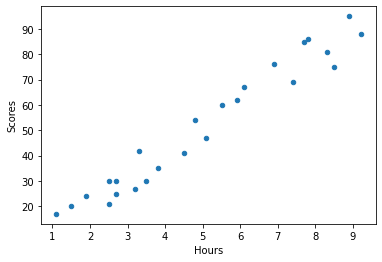

In [73]:
df.plot.scatter(x='Hours',y='Scores')

<AxesSubplot:xlabel='Hours'>

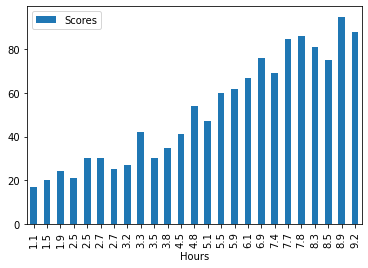

In [74]:
df.sort_values(["Hours"], axis=0,ascending=[True],inplace=True)
df.head(10)
df.plot.bar(x='Hours',y='Scores')

In [75]:
## Dividing the data into X and Y for model building
X= df.drop(['Scores'], axis=1)
y=df['Scores']
X.shape, y.shape

((25, 1), (25,))

In [76]:
#Split this data into train and test sets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0) 

## Building the Model

In [77]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(X_train, y_train) 

LinearRegression()

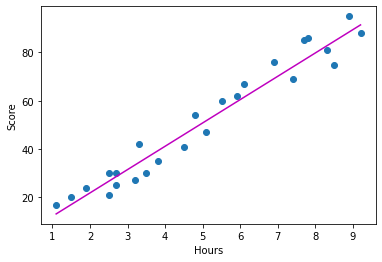

In [80]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# # Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color='m')
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

In [65]:
# Testing the algorithm
print(X_test) 
print("Predection of Score")
y_pred = regressor.predict(X_test)
print(y_pred)

    Hours
20    2.7
17    1.9
10    7.7
18    6.1
12    4.5
Predection of Score
[28.6177145  20.88803334 76.92822173 61.46885942 46.0094971 ]


In [66]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
20,30,28.617714
17,24,20.888033
10,85,76.928222
18,67,61.468859
12,41,46.009497


## Question: What will be predicted score if a student studies for 9.25 hrs/ day?

In [67]:
hours = [[9.25]]
pred = regressor.predict(hours)
print(pred)


[91.90447898]


In [86]:
# Evaluate the model
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 


Mean Absolute Error: 4.621333622532768
